<a href="https://colab.research.google.com/github/andre-sav/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', index_col=0)

In [2]:
!pip install pandas==0.23.4

In [3]:
df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [4]:
df.dtypes

age              int64
weight           int64
exercise_time    int64
dtype: object

In [5]:
df.isnull().sum()

age              0
weight           0
exercise_time    0
dtype: int64

In [6]:
df.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [20]:
exercise_time_bins = pd.cut(df['exercise_time'], 10)

weight_bins = pd.cut(df['weight'], 6)

age_bins = pd.cut(df['age'], 6)

ct = pd.crosstab(weight_bins, exercise_time_bins, normalize='columns')

ct

exercise_time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
weight,,,,,,,,,,
"(99.854, 124.333]",0.140940,0.170543,0.164634,0.171053,0.295238,0.237288,0.308511,0.326531,0.33,0.494505
"(124.333, 148.667]",0.147651,0.155039,0.213415,0.125000,0.142857,0.347458,0.319149,0.367347,0.46,0.439560
"(148.667, 173.0]",0.140940,0.170543,0.243902,0.269737,0.238095,0.220339,0.234043,0.295918,0.21,0.065934
"(173.0, 197.333]",0.194631,0.178295,0.170732,0.210526,0.200000,0.177966,0.138298,0.010204,0.00,0.000000
"(197.333, 221.667]",0.221477,0.232558,0.182927,0.223684,0.123810,0.016949,0.000000,0.000000,0.00,0.000000
"(221.667, 246.0]",0.154362,0.093023,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


In [22]:
ct2 = pd.crosstab(age_bins, exercise_time_bins, normalize='columns')

ct2

exercise_time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
age,,,,,,,,,,
"(17.938, 28.333]",0.093960,0.178295,0.121951,0.131579,0.190476,0.220339,0.244681,0.275510,0.21,0.164835
"(28.333, 38.667]",0.154362,0.232558,0.097561,0.164474,0.142857,0.203390,0.234043,0.204082,0.21,0.230769
"(38.667, 49.0]",0.127517,0.131783,0.146341,0.131579,0.114286,0.144068,0.148936,0.204082,0.34,0.252747
"(49.0, 59.333]",0.114094,0.093023,0.128049,0.111842,0.171429,0.161017,0.159574,0.163265,0.19,0.329670
"(59.333, 69.667]",0.194631,0.131783,0.201220,0.210526,0.180952,0.186441,0.191489,0.153061,0.05,0.021978
"(69.667, 80.0]",0.315436,0.232558,0.304878,0.250000,0.200000,0.084746,0.021277,0.000000,0.00,0.000000


In [17]:
pd.crosstab(age_bins, weight_bins, normalize='columns')

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(17.938, 28.333]",0.190476,0.187500,0.189723,0.136905,0.140845,0.128205
"(28.333, 38.667]",0.238095,0.161184,0.173913,0.166667,0.154930,0.102564
"(38.667, 49.0]",0.166667,0.210526,0.154150,0.130952,0.147887,0.128205
"(49.0, 59.333]",0.170068,0.164474,0.130435,0.166667,0.154930,0.025641
"(59.333, 69.667]",0.102041,0.157895,0.173913,0.190476,0.204225,0.230769
"(69.667, 80.0]",0.132653,0.118421,0.177866,0.208333,0.197183,0.384615


In [18]:
pd.crosstab(weight_bins, [age_bins, exercise_time_bins], normalize='index')


age                (17.938, 28.333]      ...       (69.667, 80.0]
exercise_time          (-0.3, 30.0]      ...       (180.0, 210.0]
weight                                   ...                     
(99.854, 124.333]          0.003401      ...             0.003401
(124.333, 148.667]         0.006579      ...             0.003289
(148.667, 173.0]           0.000000      ...             0.000000
(173.0, 197.333]           0.029762      ...             0.000000
(197.333, 221.667]         0.021127      ...             0.000000
(221.667, 246.0]           0.076923      ...             0.000000

[6 rows x 57 columns]

In [16]:
pt = pd.pivot_table(df, values='weight', index=exercise_time_bins)

pt

,weight
exercise_time,
"(-0.3, 30.0]",177.610738
"(30.0, 60.0]",171.178295
"(60.0, 90.0]",162.073171
"(90.0, 120.0]",164.381579
"(120.0, 150.0]",152.380952
"(150.0, 180.0]",145.389831
"(180.0, 210.0]",140.340426
"(210.0, 240.0]",135.326531
"(240.0, 270.0]",131.560000


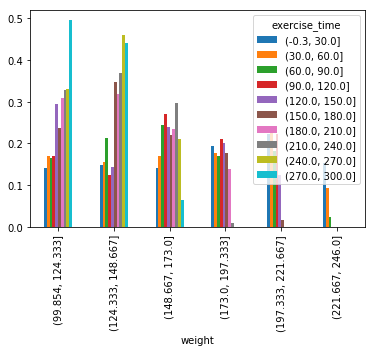

In [21]:
ct.plot.bar()

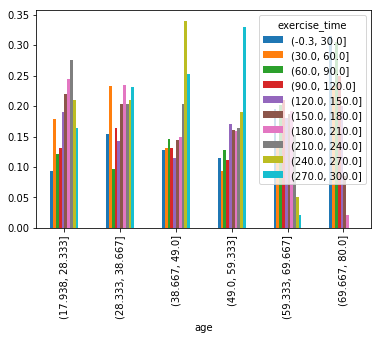

In [23]:
ct2.plot.bar()

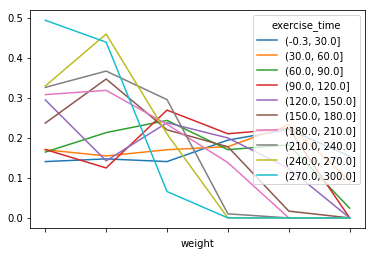

In [26]:
ct.plot()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?

The variable types are int64, meaning integers. Time is continuous, weight and age are ordinal.

The weight has a strong correlative relationship to the amount of time spent exercising. ID has no relationship to anything as it is used solely as an identifier. Weight and age do not have a clear relationship.

The real relationship is between weight and time spent exercising. Age and weight are spurious. 

